# Predicting Heart Disease with Ensemble Learning

## Name: Joseph Willemsz

## Date: April 25, 2022

**Predicting Heart Disease**

In this lab we will be using publicly available data from the Centers for Disease Control and Prevention (CDC), and in particular the Behavioral Risk Factor Surveillance System (BRFSS).

Dataset: https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease

**Our primary goal is to predict heart disease.** 

# Table of Contents

- [Data Import and Cleaning](#import)
- [Adaboost Ensemble Model](#ada)
- [Gradient Boosting Ensemble Model](#gradient)
- [XGBoosting Ensemble Model](#xg)
- [Conclusion](#conc)

---

# Data Import and Cleaning <a class="anchor" id="import"></a>

Import heart disease data set. 

In [1]:
import pandas as pd
import numpy as np
heart_data = pd.read_csv("Data/heart_2020_cleaned.csv")

Next we apply the `clean_names()` function to the `heart_data` columns names.

In [2]:
from janitor import clean_names

names = []
for i in range(len(heart_data.columns)):
    names.append(clean_names(heart_data.columns[i]))

# fix b_mi -> bmi
names[1] = 'bmi'

heart_data.columns = names

In [3]:
heart_data

,heart_disease,bmi,smoking,alcohol_drinking,stroke,physical_health,mental_health,diff_walking,sex,age_category,race,diabetic,physical_activity,gen_health,sleep_time,asthma,kidney_disease,skin_cancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


Here we define a dataset `X` that contains data on the predictor variables and a dataset `y` that contains the target variable `heart_disease`.

In [4]:
X_total = heart_data.drop('heart_disease', axis='columns')
X_total = pd.get_dummies(X_total, drop_first=True)
y_total = heart_data["heart_disease"]

We can see that the data is imbalanced since the there are more observations that do not have heart disease **(292,422)** than those that do **(27,373)**. 

In [5]:
y_total.value_counts()

No     292422
Yes     27373
Name: heart_disease, dtype: int64

Here we can see that only **8.6%** of the observations in the data have heart disease.

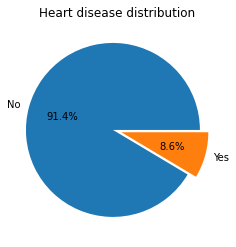

In [6]:
ax = y_total.value_counts().plot(kind='pie',
                          explode=[0.05, 0.05], 
                          autopct='%.1f%%', 
                          title = "Heart disease distribution",
                          ylabel="")

In order to fix this we must use a method called random undersampling. That is, we will sample 27,373 non-heart-disease observations in order to have balanced data. 

In [7]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(sampling_strategy=0.5) #float
# rus = RandomUnderSampler(sampling_strategy="not minority") #string

X, y = rus.fit_resample(X_total, y_total)
y.value_counts()

No     54746
Yes    27373
Name: heart_disease, dtype: int64

Here is a visual representation showing us that our data is now balanced within the `heart_disease` variable.

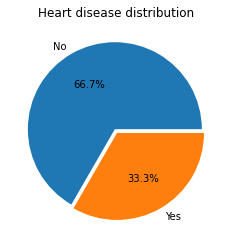

In [8]:
ax = y.value_counts().plot(kind='pie',
                          explode=[0.025, 0.025], 
                          autopct='%.1f%%', 
                          title = "Heart disease distribution",
                          ylabel="")

In [9]:
# remove warnings
import warnings
warnings.filterwarnings('ignore')

---

# AdaBoost Ensemble Model <a class="anchor" id="ada"></a>

In [10]:
# evaluate adaboost algorithm for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import AdaBoostClassifier
from random import seed

seed(0)
for i in np.arange(0.1, 2.1, 0.1):
    AdaBoost = AdaBoostClassifier(learning_rate=i)
    AdaBoost.fit(X,y)
    prediction = AdaBoost.score(X,y)
    print('Accuracy:', round(prediction*100, 4),'%', "\t where learning_rate=", round(i, 2))

Accuracy: 73.8964 % 	 where learning_rate= 0.1
Accuracy: 75.5903 % 	 where learning_rate= 0.2
Accuracy: 76.3648 % 	 where learning_rate= 0.3
Accuracy: 76.6132 % 	 where learning_rate= 0.4
Accuracy: 76.8896 % 	 where learning_rate= 0.5
Accuracy: 77.026 % 	 where learning_rate= 0.6
Accuracy: 77.1709 % 	 where learning_rate= 0.7
Accuracy: 77.1868 % 	 where learning_rate= 0.8
Accuracy: 77.2245 % 	 where learning_rate= 0.9
Accuracy: 77.2416 % 	 where learning_rate= 1.0
Accuracy: 77.3329 % 	 where learning_rate= 1.1
Accuracy: 77.2598 % 	 where learning_rate= 1.2
Accuracy: 77.2087 % 	 where learning_rate= 1.3
Accuracy: 77.339 % 	 where learning_rate= 1.4
Accuracy: 77.188 % 	 where learning_rate= 1.5
Accuracy: 76.9347 % 	 where learning_rate= 1.6
Accuracy: 76.8592 % 	 where learning_rate= 1.7
Accuracy: 76.6777 % 	 where learning_rate= 1.8
Accuracy: 75.6962 % 	 where learning_rate= 1.9
Accuracy: 28.9969 % 	 where learning_rate= 2.0


In [ ]:
seed(0)
for n in [10, 50, 100, 500, 1000]:
    AdaBoost = AdaBoostClassifier(n_estimators=n, learning_rate=1.4)
    AdaBoost.fit(X,y)
    prediction = AdaBoost.score(X,y)
    print('Accuracy:', round(prediction*100, 4),'%', "\t where learning_rate=1.4 and n_trees=", n)

Accuracy: 74.3178 % 	 where learning_rate=1.1 and n_trees= 10
Accuracy: 77.339 % 	 where learning_rate=1.1 and n_trees= 50
Accuracy: 77.4352 % 	 where learning_rate=1.1 and n_trees= 100
Accuracy: 77.5387 % 	 where learning_rate=1.1 and n_trees= 500


In [ ]:
# hyperparameters values for adaboost
search_space = {
    'n_estimators' : [10, 50, 100, 500, 1000],
    'learning_rate':[0.001, 0.01, 0.1, 1]
}

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

np.random.seed(1)
adaboost_model = AdaBoostClassifier()

In [ ]:
from sklearn.model_selection import GridSearchCV

np.random.seed(1)

adaboost_gs = GridSearchCV(estimator = adaboost_model,
                  param_grid = search_space,
                  scoring = 'accuracy',
                  cv = 2,
                  verbose = 4)

In [ ]:
adaboost_gs.fit(X, y)

In [ ]:
# complete details of the best model
adaboost_gs.best_params_

In [ ]:
# get best hyperparameters we specified
adaboost_gs.best_score_

After testing various values for the learing rate and number of trees in our AdaBoosting Ensemble model, we found the following optimal hyperparameters:
- **Learning rate = 0.1**
- **Number of estimators = 500**

---

# Gradient Boosting Ensemble Model <a class="anchor" id="gradient"></a>

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier

seed(0)
for i in np.arange(0.1, 2.1, 0.1):
    GradientBoost = GradientBoostingClassifier(learning_rate=i)
    GradientBoost.fit(X,y)
    prediction = GradientBoost.score(X,y)
    print('Accuracy:', round(prediction*100, 4),'%', "\t where learning_rate=", round(i, 2))

In [ ]:
seed(0)
for n in [10, 50, 100, 500, 1000]:
    GradientBoost = GradientBoostingClassifier(n_estimators=n, learning_rate=0.8)
    GradientBoost.fit(X,y)
    prediction = GradientBoost.score(X,y)
    print('Accuracy:', round(prediction*100, 4),'%', "\t where learning_rate=0.8 and n_trees=", n)

In [ ]:
# hyperparameters values for adaboost
search_space = {
    'n_estimators' : [10, 50, 100, 500, 1000],
    'learning_rate':[0.001, 0.01, 0.1, 1]
}

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

np.random.seed(1)
gradientboost_model = GradientBoostingClassifier()

In [ ]:
from sklearn.model_selection import GridSearchCV

np.random.seed(1)

gradientboost_gs = GridSearchCV(estimator = gradientboost_model,
                  param_grid = search_space,
                  scoring = 'accuracy',
                  cv = 2,
                  verbose = 4)

In [ ]:
gradientboost_gs.fit(X, y)

In [ ]:
gradientboost_gs.best_params_

In [ ]:
gradientboost_gs.best_score_

After testing various values for the learing rate and number of trees in our Gradient Boosting Ensemble model, we found the following optimal hyperparameters:
- **Learning rate = 0.01**
- **Number of estimators = 1000**

---

# XGBoosting Ensemble Model <a class="anchor" id="xg"></a>

In [ ]:
# evaluate xgboost algorithm for classification
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from xgboost import XGBClassifier

seed(0)
for i in np.arange(0.1, 2.1, 0.1):
    XGBoost = XGBClassifier(eval_metric='merror', learning_rate=i)
    XGBoost.fit(X,y)
    prediction = XGBoost.score(X,y)
    print('Accuracy:', round(prediction*100, 4),'%', "\t where learning_rate=", round(i, 2))

In [ ]:
seed(0)
for n in [10, 50, 100, 500, 1000]:
    XGBoost = XGBClassifier(eval_metric='merror', learning_rate=1.3, n_estimators=n)
    XGBoost.fit(X,y)
    prediction = XGBoost.score(X,y)
    print('Accuracy:', round(prediction*100, 4),'%', "\t where learning_rate=1.2 and n_trees=", n)

In [ ]:
# hyperparameters values for adaboost
search_space = {
    'n_estimators' : [100, 500, 1000],
    'learning_rate':[0.5, 1, 1.5]
}

In [ ]:
from xgboost import XGBClassifier

np.random.seed(1)
xgboost_model = XGBClassifier(eval_metric='merror')

In [ ]:
from sklearn.model_selection import GridSearchCV

np.random.seed(1)
xgboost_gs = GridSearchCV(estimator = xgboost_model,
                  param_grid = search_space,
                  scoring = 'accuracy',
                  cv = 2,
                  verbose = 3)

In [ ]:
xgboost_gs.fit(X, y)

In [ ]:
xgboost_gs.best_params_

In [ ]:
xgboost_gs.best_score_

After testing various values for the learing rate and number of trees in our XGBoosting Ensemble model, we found the following optimal hyperparameters:
- **Learning rate = 1.7**
- **Number of estimators = 1000**

---

# Conclusion <a class="anchor" id="conc"></a>

## Optimal AdaBoosting Ensemble Model

In [ ]:
%%time
seed(0)
AdaBoost = AdaBoostClassifier(learning_rate=2.0, n_estimators=1000)
AdaBoost.fit(X_rus,y_rus)
prediction = AdaBoost.score(X,y)
print('Accuracy: ', round(prediction*100, 4),'%')

## Optimal Gradient Boosting Ensemble Model

In [ ]:
%%time
seed(0)
GradientBoost = GradientBoostingClassifier(learning_rate=0.2, n_estimators=1000)
GradientBoost.fit(X_rus, y_rus)
prediction = GradientBoost.score(X,y)
print('Accuracy: ', round(prediction*100, 4),'%')

## Optimal XGBoosting Ensemble Model

In [ ]:
%%time
seed(0)
XGBoost = XGBClassifier(eval_metric='merror', learning_rate=1.7, n_estimators=1000)
XGBoost.fit(X_rus,y_rus)
prediction = XGBoost.score(X,y)
print('Accuracy: ', round(prediction*100, 4),'%')

1. In conclusion, the best model in predicting heart disease is the optimal **XGBoosting Ensemble Model**, with an accuracy = 98.8%.
    - This model also ran the fastest at 22 seconds. 
    - Hyperparameters:
        - Learning rate = 1.3
        - Number of trees = 1000
2. Followed by the optimal Gradient Boosting Ensemble Model with an accuracy = 82.6%.
    - This model finished running in around a minute.
    - Hyperparameters:
        - Learning rate = 0.8
        - Number of trees = 1000
3. In last comes the optimal AdaBoosting Ensemble Model with an accuracy = 76.5%
    - This model finished running in one minute and 30 seconds.
    - Hyperparameters:
        - Learning rate = 1.1
        - Number of trees = 1000